# ITCS 5156 - Project
## A Hybrid Regression Technique for House Prices Prediction

#### Sifei Lu, Zengxiang Li, Zheng Qin, Xulei Yang, Rick Siow Mong Goh
#### ©2017 IEEE

#### Project by
#### Smita Nannaware [801208588]


# 1. Data Preparation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
house_df = pd.read_csv('Data/train.csv')
display(house_df)
house_df.describe()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [3]:
house_test_df = pd.read_csv('Data/test.csv')
display(house_test_df)
house_test_df.describe()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [4]:
T = house_df['SalePrice']

In [5]:
house_df = house_df.drop(columns=['Id', 'SalePrice'])
house_test_df = house_test_df.drop(columns=['Id'])

In [6]:
house_df = pd.concat([house_df, house_test_df]).reset_index(drop=True)

<AxesSubplot:>

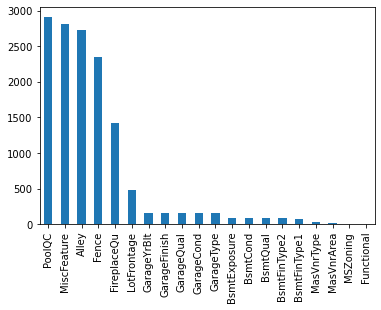

In [7]:
house_df.isnull().sum().sort_values(ascending=False)[:20].plot.bar()

In [8]:
house_df.isnull().sum().sort_values(ascending=False)[:20]

PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
FireplaceQu     1420
LotFrontage      486
GarageYrBlt      159
GarageFinish     159
GarageQual       159
GarageCond       159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
Functional         2
dtype: int64

In [9]:
null_cols = ['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','LotFrontage','GarageYrBlt','GarageCond',
             'GarageType','GarageFinish','GarageQual','BsmtFinType2','BsmtExposure','BsmtQual','BsmtCond','BsmtFinType1',
             'MasVnrArea','MasVnrType','Electrical','MSSubClass']

for col in null_cols:
    print(col, house_df[col].dtype)

PoolQC object
MiscFeature object
Alley object
Fence object
FireplaceQu object
LotFrontage float64
GarageYrBlt float64
GarageCond object
GarageType object
GarageFinish object
GarageQual object
BsmtFinType2 object
BsmtExposure object
BsmtQual object
BsmtCond object
BsmtFinType1 object
MasVnrArea float64
MasVnrType object
Electrical object
MSSubClass int64


1. Too many missing values
No value : Alley, PoolQc, Fence, MiscFeature, FireplaceQu, 
2. Replace with Median
LotFrontage, MasVnrArea, 
3. Replace with Mode
GarageYrBlt, GarageCond, GarageType, GarageFinish,GarageQual,BsmtFinType2, BsmtExposure,BsmtQual,BsmtCond,BsmtFinType1, MasVnrType,Electrical, etc

In [10]:
def preprocess_input(df):
    df = df.drop(columns=['Id'])
    
    cols = ['Alley','PoolQC', 'Fence', 'MiscFeature','FireplaceQu']
    df[cols] = df[cols].fillna(value='No Value')
    
    print('******** Replacing columns with too many null values with No Value ***********')
    for col in cols:
        print( col, 'No Value', df[col].value_counts()['No Value'])
    
    print('******** Replacing missing values with Median ***********')
    cols = ['LotFrontage', 'MasVnrArea']
    df[cols]=df[cols].fillna(df[cols].median())

    for col in cols:
        print( col, df[col].median(), df[col].value_counts()[df[col].median()])
    
    print('******** Replacing missing values with Mode ***********')
    for column in df:
        if df[column].isnull().any():   
            df[column]=df[column].fillna(df[column].mode()[0])
            print(column, df[column].mode().values[0], df[column].value_counts()[df[column].mode()].values[0])
    
    return df

In [11]:
# Replace NA with No Value
cols = ['Alley','PoolQC', 'Fence', 'MiscFeature','FireplaceQu']
house_df[cols] = house_df[cols].fillna(value='No Value')
for col in cols:
    print( col, 'No Value', house_df[col].value_counts()['No Value'])

Alley No Value 2721
PoolQC No Value 2909
Fence No Value 2348
MiscFeature No Value 2814
FireplaceQu No Value 1420


In [12]:
cols = ['LotFrontage', 'MasVnrArea']
for col in cols:
    print( col, house_df[col].median(), house_df[col].value_counts()[house_df[col].median()])

LotFrontage 68.0 44
MasVnrArea 0.0 1738


In [13]:
house_df[cols]=house_df[cols].fillna(house_df[cols].median())

for col in cols:
    print( col, house_df[col].median(), house_df[col].value_counts()[house_df[col].median()])

LotFrontage 68.0 530
MasVnrArea 0.0 1761


In [14]:
cols = ['GarageYrBlt','GarageCond','GarageType','GarageFinish','GarageQual','BsmtFinType2',
        'BsmtExposure','BsmtQual','BsmtCond','BsmtFinType1','MasVnrType','Electrical']
for col in cols:
    print(col, house_df[col].mode().values[0], house_df[col].value_counts()[house_df[col].mode()].values[0])

GarageYrBlt 2005.0 142
GarageCond TA 2654
GarageType Attchd 1723
GarageFinish Unf 1230
GarageQual TA 2604
BsmtFinType2 Unf 2493
BsmtExposure No 1904
BsmtQual TA 1283
BsmtCond TA 2606
BsmtFinType1 Unf 851
MasVnrType None 1742
Electrical SBrkr 2671


In [15]:
for column in house_df:
    if house_df[column].isnull().any():  
        house_df[column]=house_df[column].fillna(house_df[column].mode()[0])
        print(column, house_df[column].mode().values[0], house_df[column].value_counts()[house_df[column].mode()].values[0])
    

MSZoning RL 2269
Utilities AllPub 2918
Exterior1st VinylSd 1026
Exterior2nd VinylSd 1015
MasVnrType None 1766
BsmtQual TA 1364
BsmtCond TA 2688
BsmtExposure No 1986
BsmtFinType1 Unf 930
BsmtFinSF1 0.0 930
BsmtFinType2 Unf 2573
BsmtFinSF2 0.0 2572
BsmtUnfSF 0.0 242
TotalBsmtSF 0.0 79
Electrical SBrkr 2672
BsmtFullBath 0.0 1707
BsmtHalfBath 0.0 2744
KitchenQual TA 1493
Functional Typ 2719
GarageType Attchd 1880
GarageYrBlt 2005.0 301
GarageFinish Unf 1389
GarageCars 2.0 1595
GarageArea 0.0 158
GarageQual TA 2763
GarageCond TA 2813
SaleType WD 2526


In [16]:
np.any(house_df.isna())

False

In [17]:
quantitative = [f for f in house_df.columns if house_df.dtypes[f] != 'object']
qualitative = [f for f in house_df.columns if house_df.dtypes[f] == 'object']
print("Numeric Features: ", len(quantitative),  quantitative)
print("Categorical Features: ", len(qualitative), qualitative)

Numeric Features:  36 ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
Categorical Features:  43 ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'Garag

## Data Visualization

<AxesSubplot:ylabel='Frequency'>

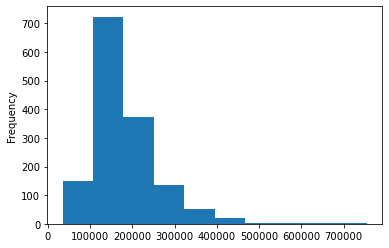

In [18]:
T.plot.hist()

In [19]:
T

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [20]:
Tlog = T.copy()
Tlog = T.apply(lambda x: np.log(x))
Tlog

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1460, dtype: float64

<AxesSubplot:ylabel='Frequency'>

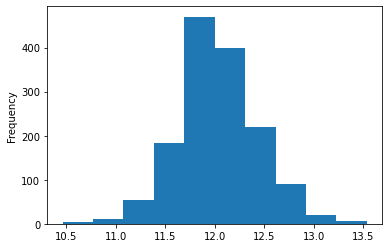

In [21]:
Tlog.plot.hist()

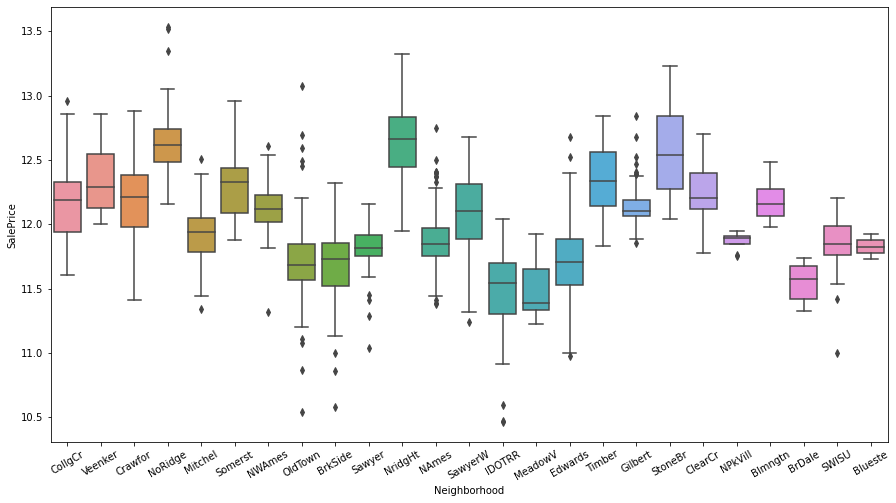

In [22]:
plt.figure(figsize = (15,8))
ax = sns.boxplot(x="Neighborhood", y=Tlog, data=house_df)
ax = ax.set_xticklabels(ax.get_xticklabels(),rotation=30)

## Log transformation of Numeric types 

In [23]:
len(quantitative)

36

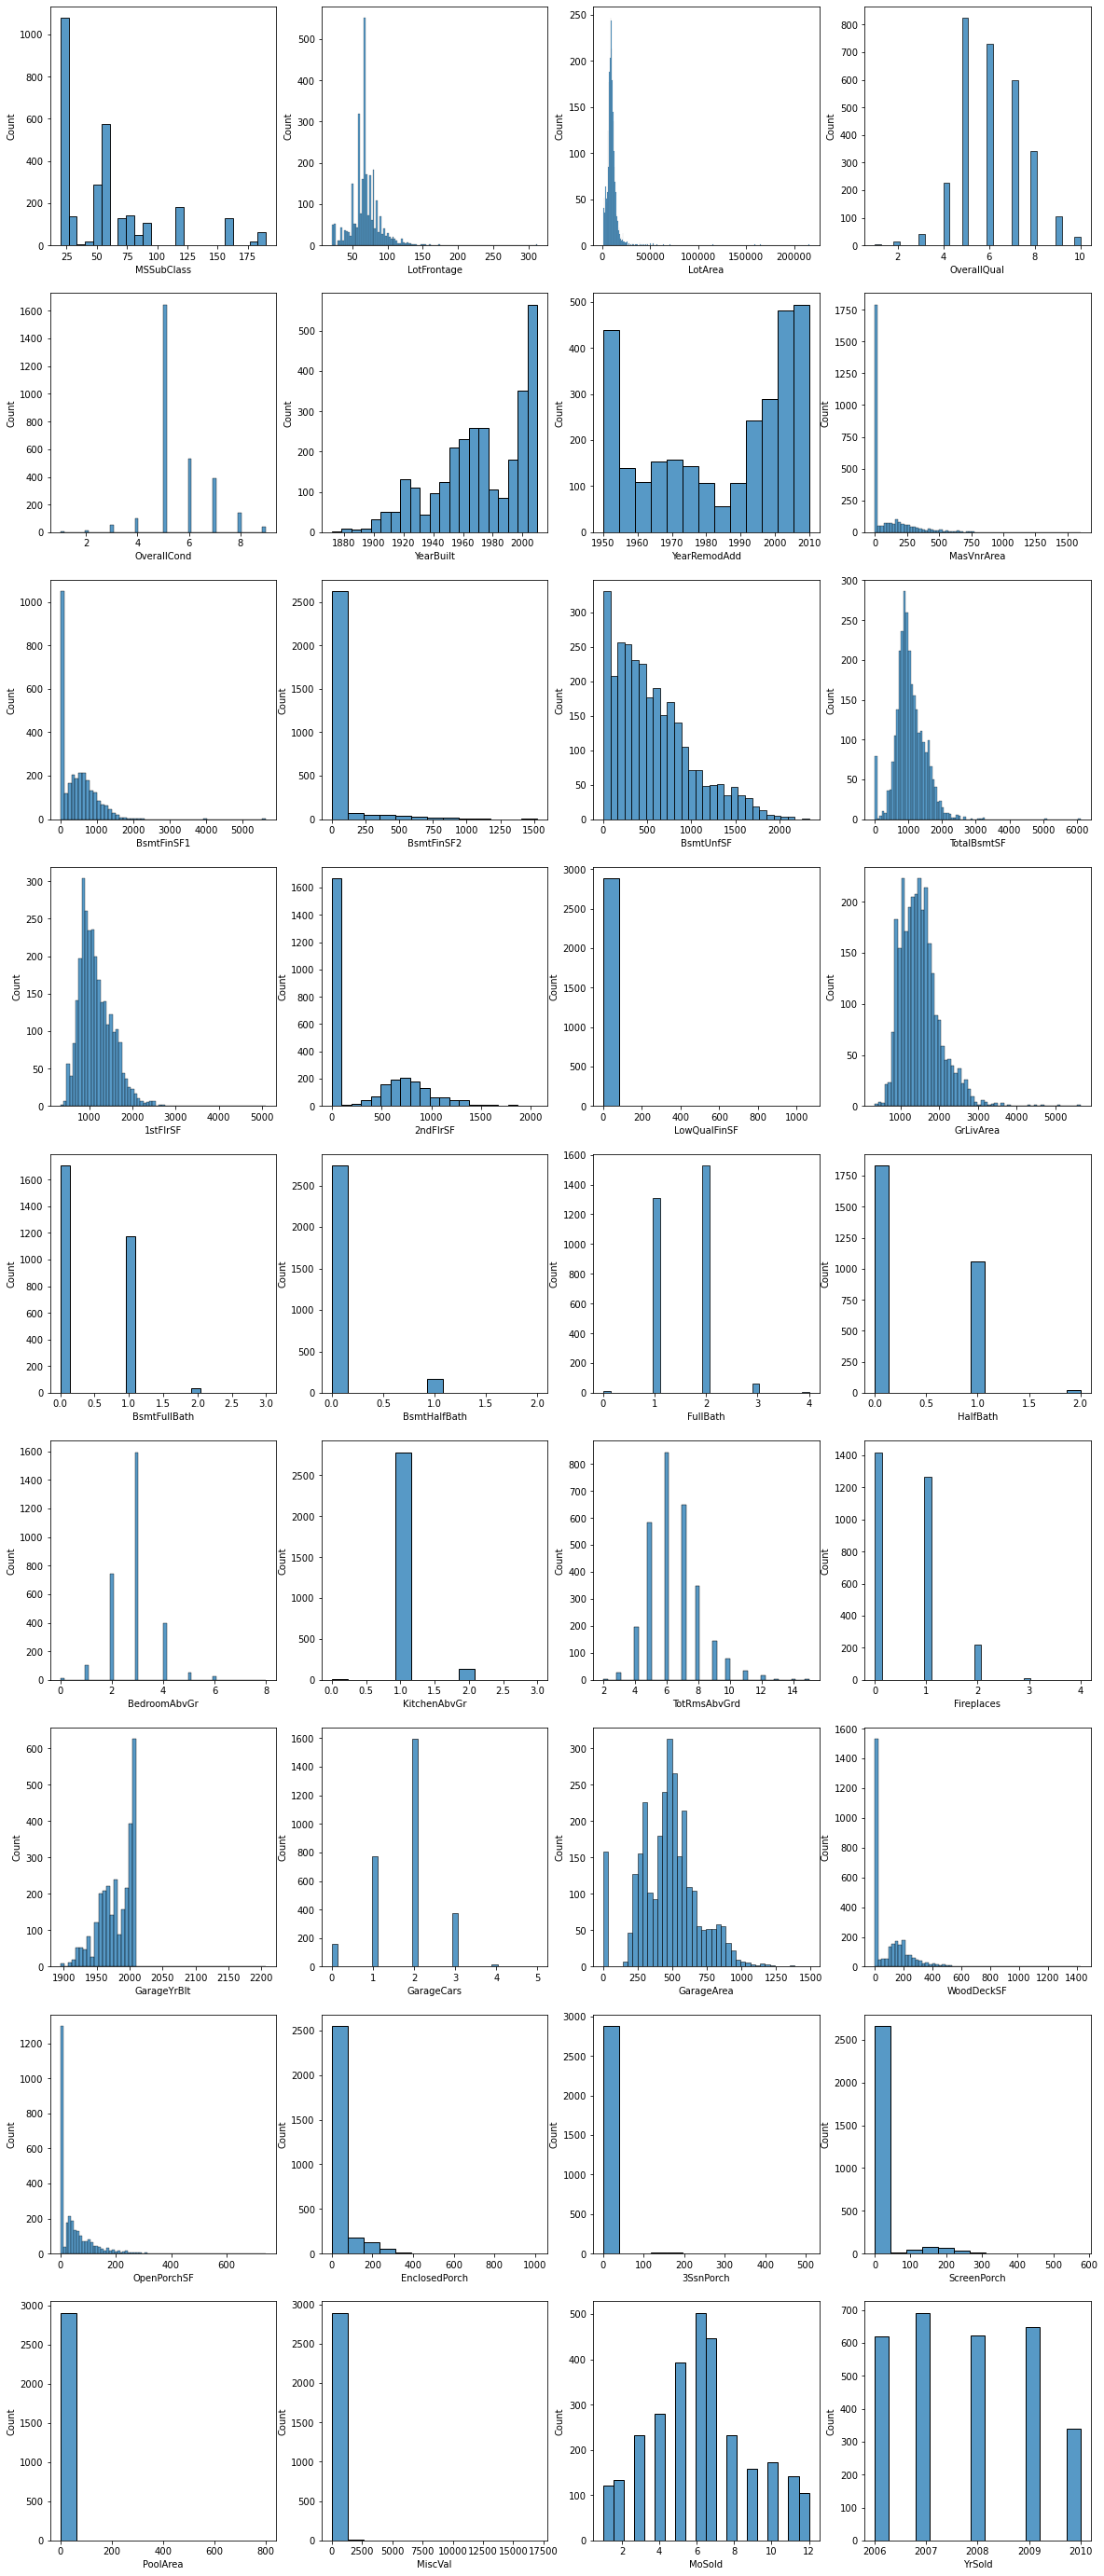

In [24]:
fig, axes = plt.subplots(9, 4, figsize= (20, 50))

for i, col in enumerate(quantitative):
    sns.histplot(data=house_df, x=col, ax=axes[int(i/4), i%4])

In [25]:
x = house_df.skew()
x = x.where(x > 1)
pos_skew_features = x.dropna().index
pos_skew_features

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtHalfBath', 'KitchenAbvGr', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'],
      dtype='object')

In [26]:
quant_features = house_df[quantitative].copy()
quant_log_features = quant_features[:].copy()
quant_log_features[pos_skew_features] = quant_features[pos_skew_features].apply(lambda x: np.log1p(x))
quant_log_features

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,4.110874,4.189655,9.042040,7,5,2003,2003,5.283204,6.561031,0.0,...,548.0,0.000000,4.127134,0.000000,0.0,0.0,0.0,0.000000,2,2008
1,3.044522,4.394449,9.169623,6,8,1976,1976,0.000000,6.886532,0.0,...,460.0,5.700444,0.000000,0.000000,0.0,0.0,0.0,0.000000,5,2007
2,4.110874,4.234107,9.328212,7,5,2001,2002,5.093750,6.188264,0.0,...,608.0,0.000000,3.761200,0.000000,0.0,0.0,0.0,0.000000,9,2008
3,4.262680,4.110874,9.164401,7,5,1915,1970,0.000000,5.379897,0.0,...,642.0,0.000000,3.583519,5.609472,0.0,0.0,0.0,0.000000,2,2006
4,4.110874,4.442651,9.565284,8,5,2000,2000,5.860786,6.486161,0.0,...,836.0,5.262690,4.442651,0.000000,0.0,0.0,0.0,0.000000,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,5.081404,3.091042,7.568896,4,7,1970,1970,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,6,2006
2915,5.081404,3.091042,7.546974,4,5,1970,1970,0.000000,5.533389,0.0,...,286.0,0.000000,3.218876,0.000000,0.0,0.0,0.0,0.000000,4,2006
2916,3.044522,5.081404,9.903538,5,7,1960,1996,0.000000,7.110696,0.0,...,576.0,6.163315,0.000000,0.000000,0.0,0.0,0.0,0.000000,9,2006
2917,4.454347,4.143135,9.253591,5,5,1992,1992,0.000000,5.823046,0.0,...,0.0,4.394449,3.496508,0.000000,0.0,0.0,0.0,6.552508,7,2006


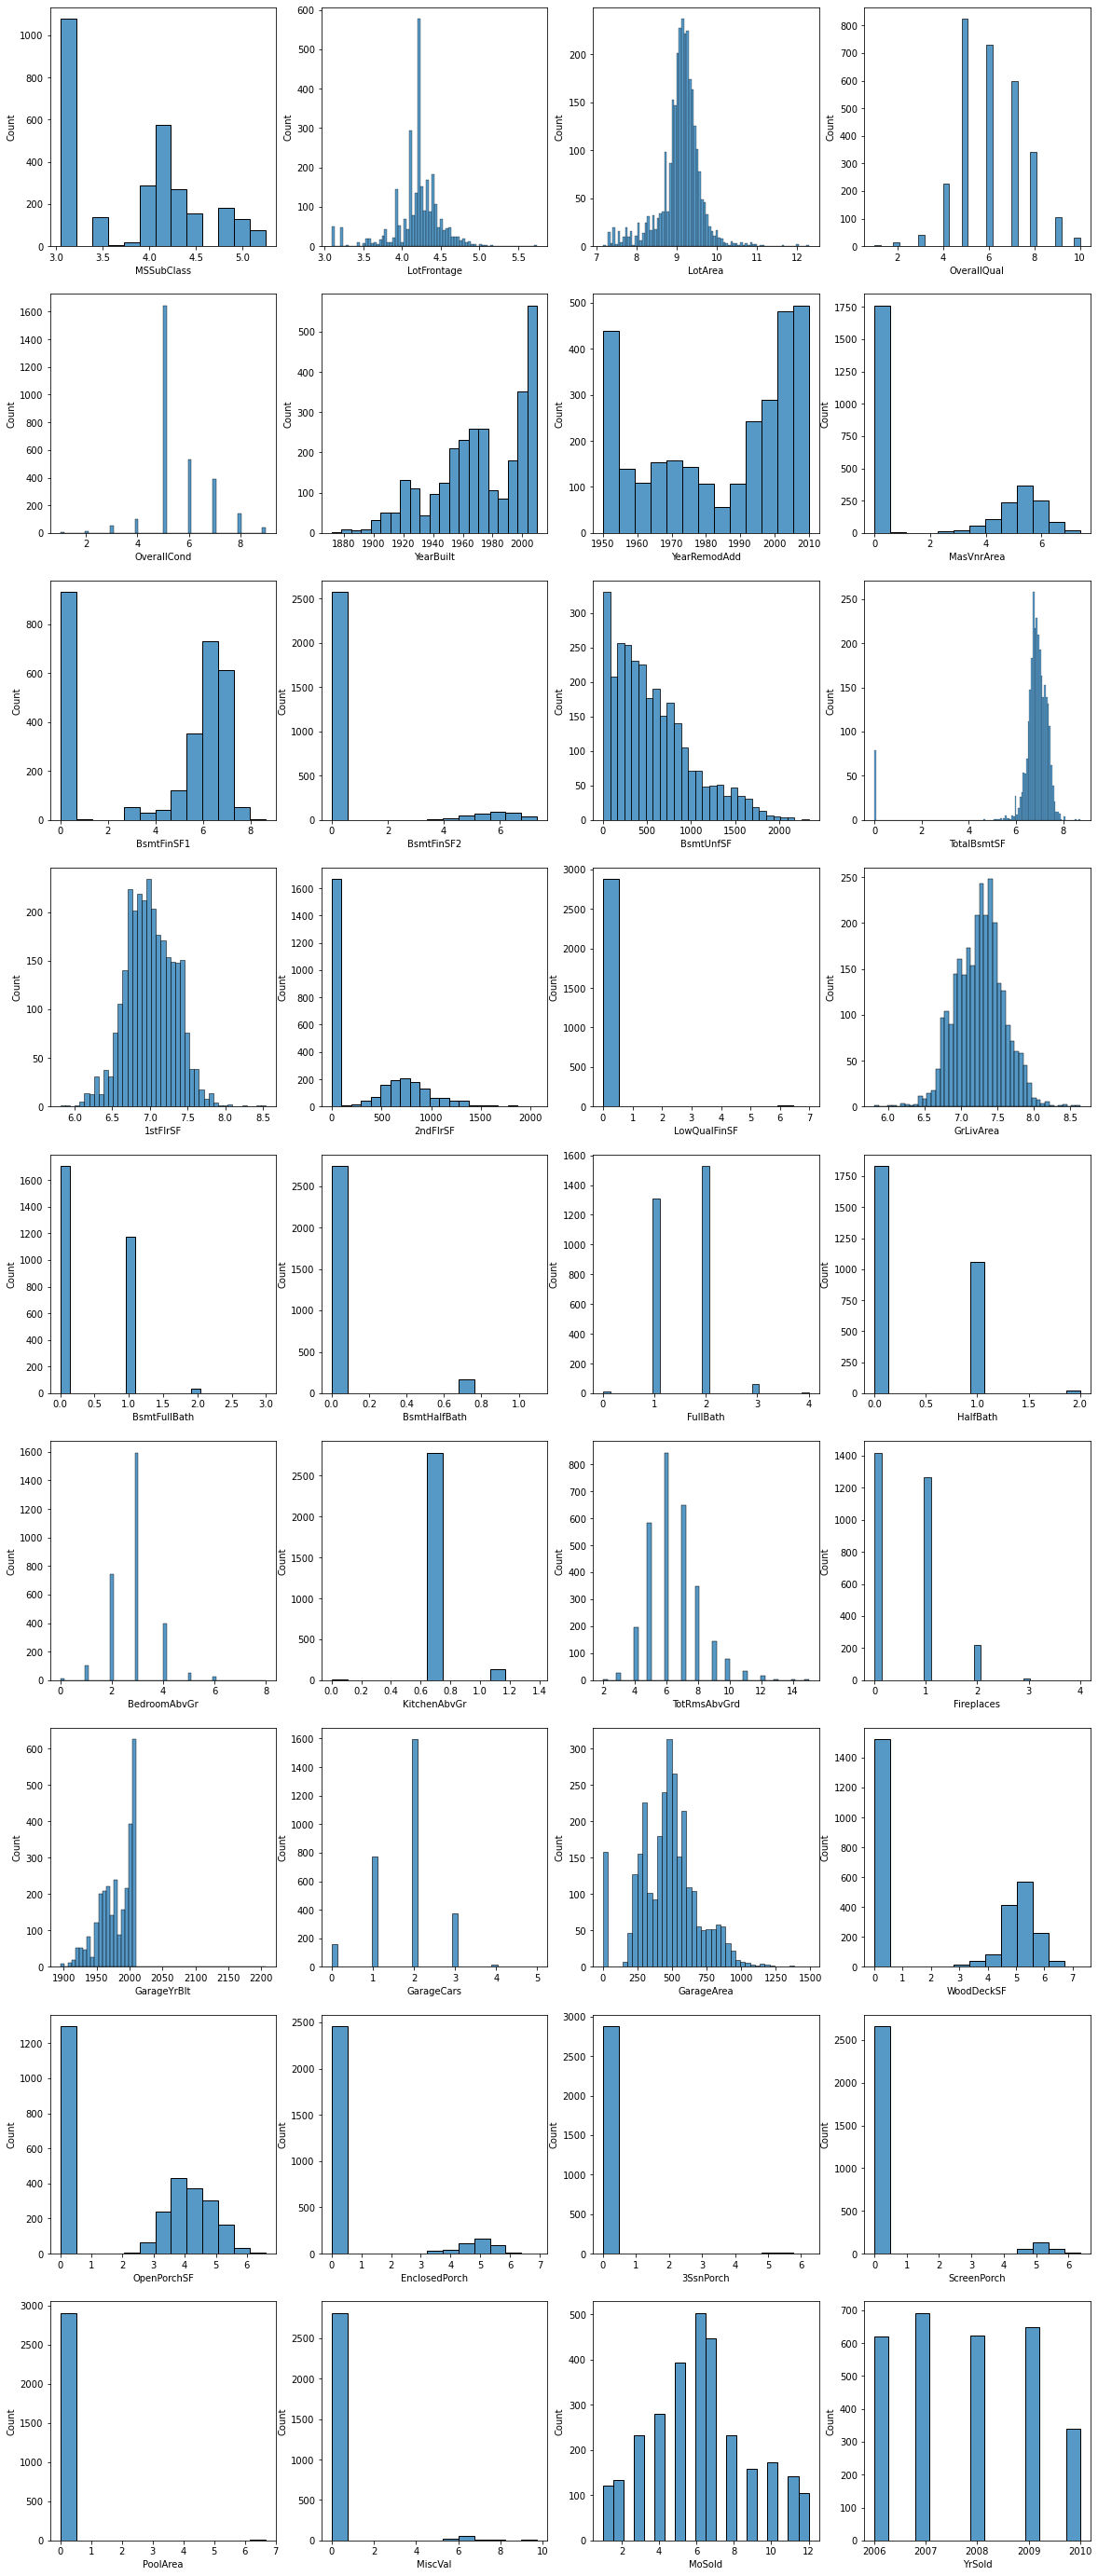

In [27]:
fig, axes = plt.subplots(9, 4, figsize= (20, 50))

for i, col in enumerate(quantitative):
    sns.histplot(data=quant_log_features, x=col, ax=axes[int(i/4), i%4])


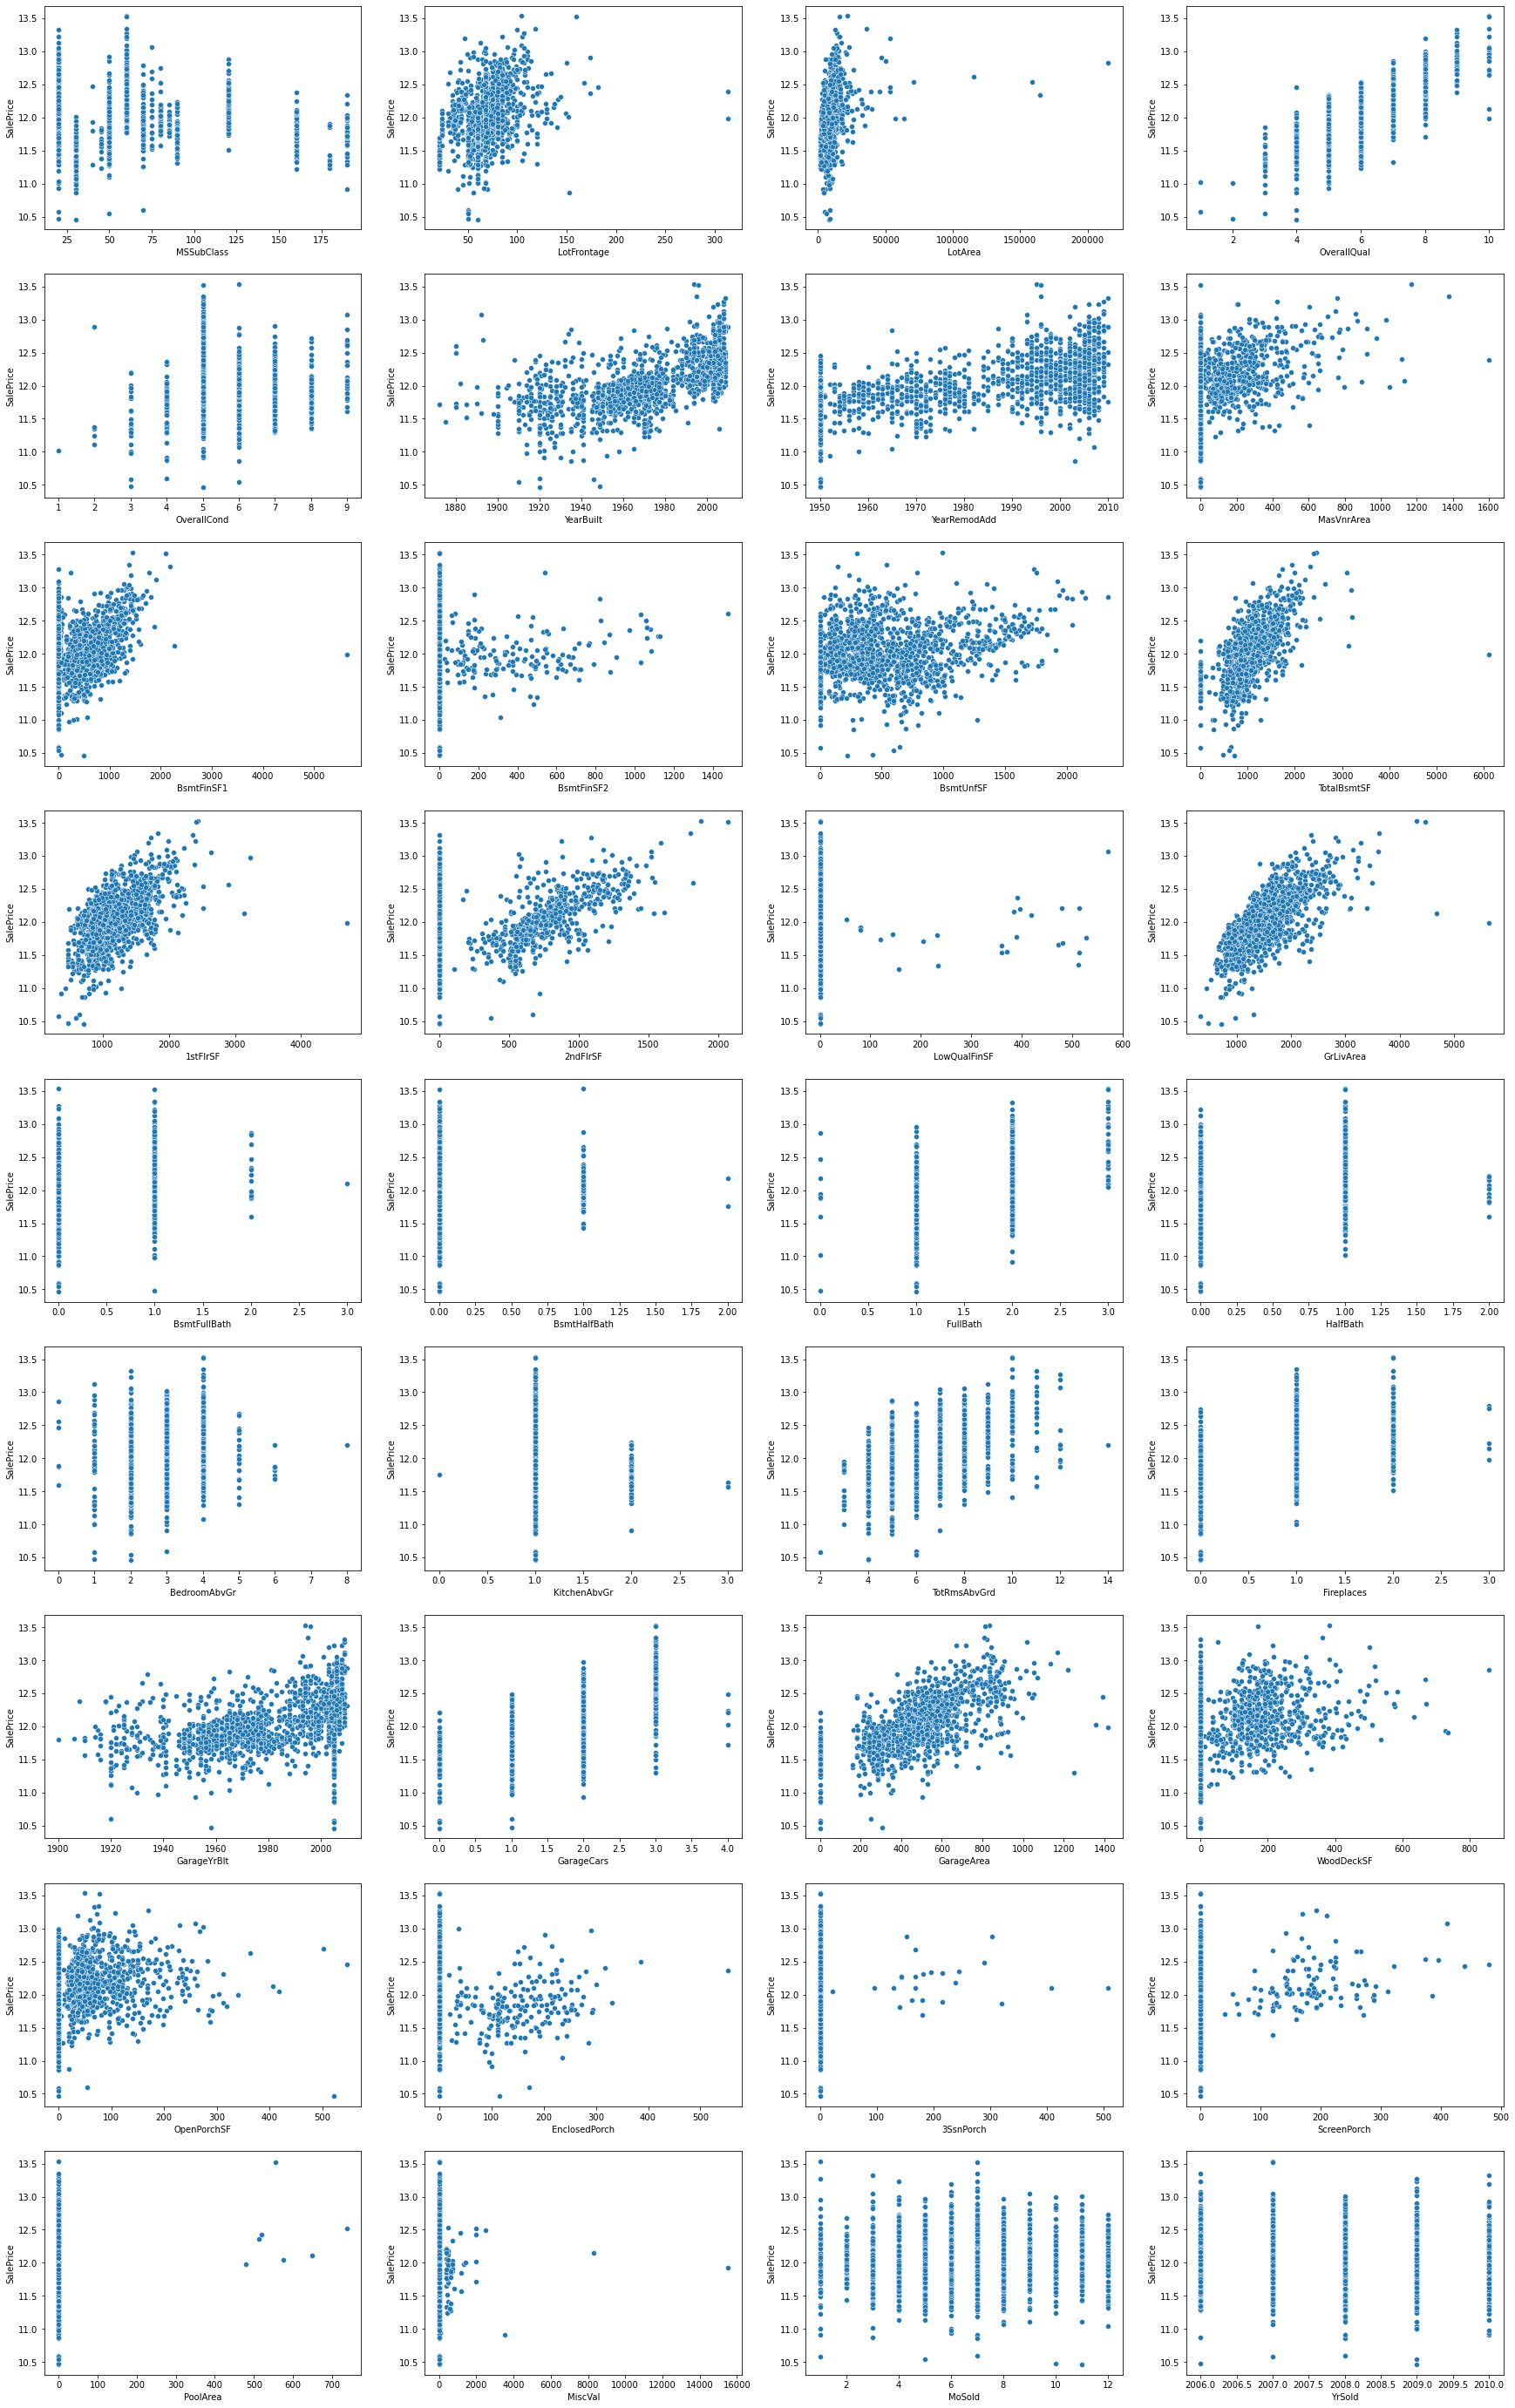

In [28]:
fig, axes = plt.subplots(9, 4, figsize= (30, 50))

for i, col in enumerate(quantitative):
    sns.scatterplot(data=house_df, x=col, y=Tlog, ax=axes[int(i/4), i%4])

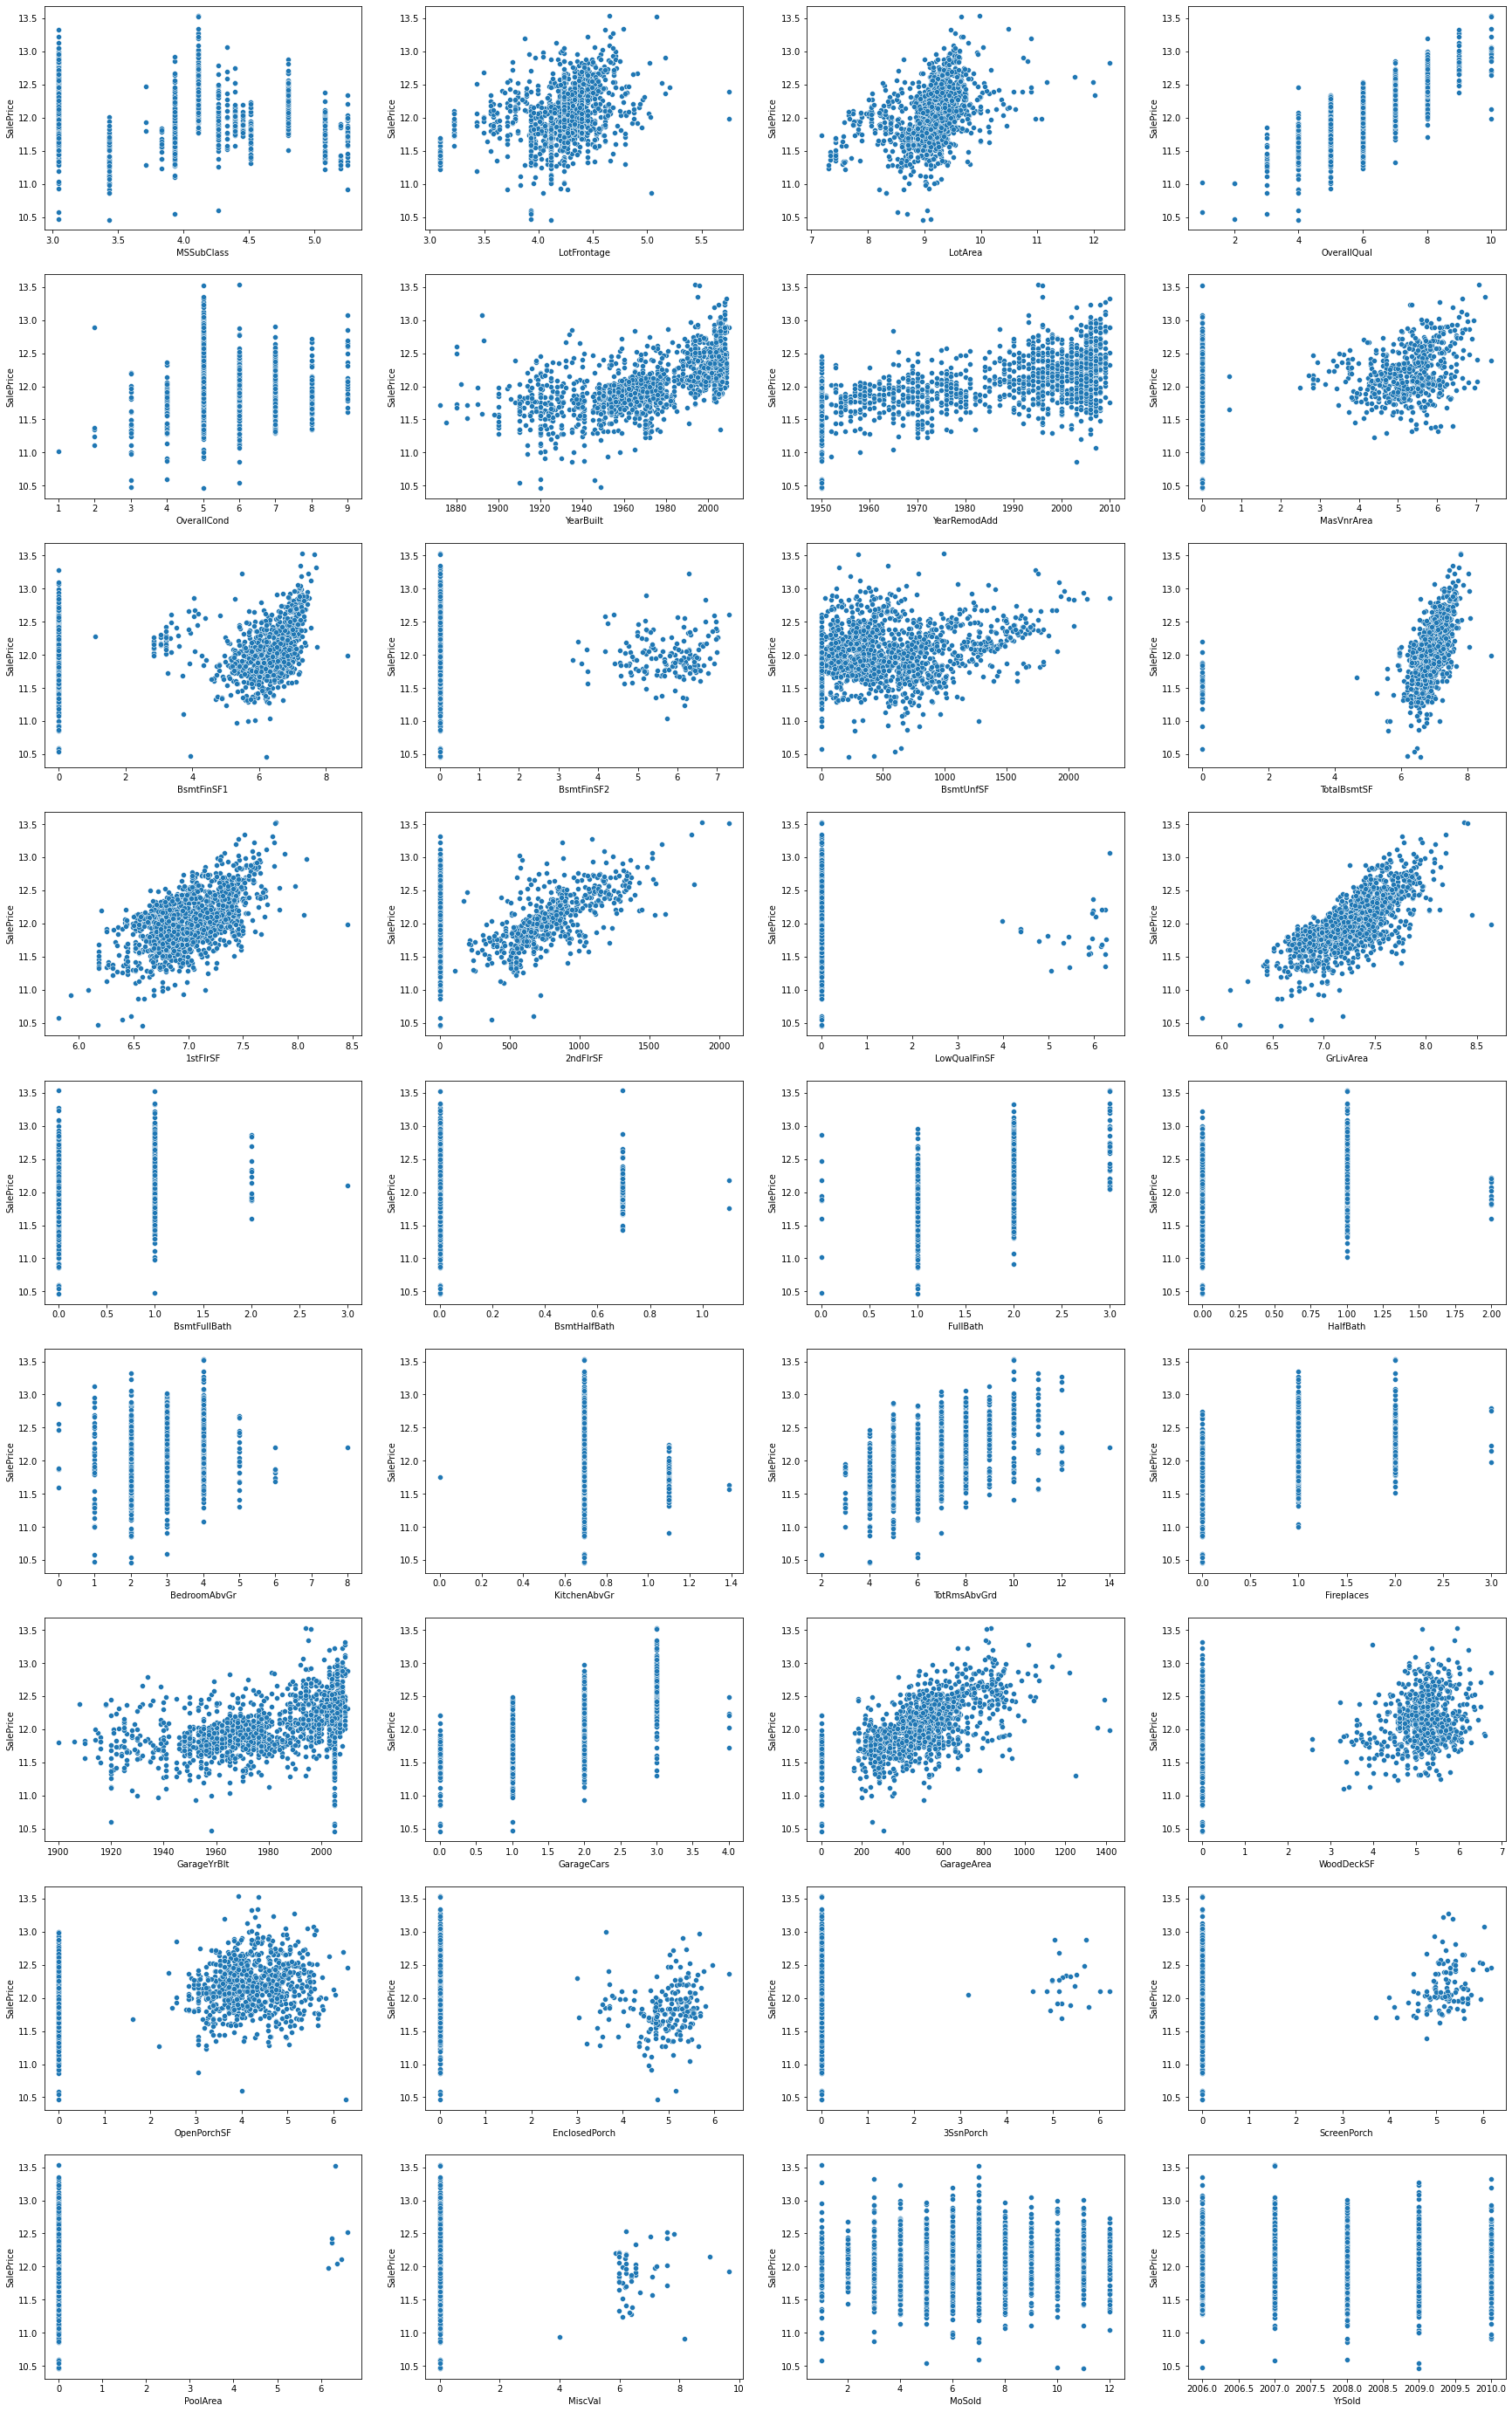

In [29]:
fig, axes = plt.subplots(9, 4, figsize= (30, 50))

for i, col in enumerate(quantitative):
    sns.scatterplot(data=quant_log_features, x=col, y=Tlog, ax=axes[int(i/4), i%4])

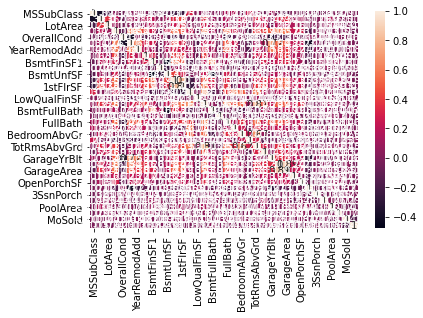

In [30]:
ax = sns.heatmap(house_df.corr(), annot=True)

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

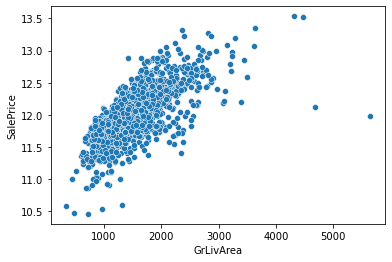

In [31]:
sns.scatterplot(data=house_df, x='GrLivArea', y=Tlog)

## Categorical Transaformation

In [32]:
def transformQuality(x):
    if x == 'EX':
        return 5
    elif x == 'Gd':
        return 4
    elif x == 'TA':
        return 3
    elif x == 'Fa':
        return 2
    elif x == 'Po':
        return 1
    return 0
    

In [33]:
qualTansFeatures = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC']

qualitative_features = house_df[qualitative].copy()

for col in qualTansFeatures:
       qualitative_features[col] = qualitative_features[col].apply(transformQuality)

qualitative_features

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,No Value,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,3,3,Y,0,No Value,No Value,WD,Normal
1,RL,Pave,No Value,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,3,3,Y,0,No Value,No Value,WD,Normal
2,RL,Pave,No Value,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,3,3,Y,0,No Value,No Value,WD,Normal
3,RL,Pave,No Value,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,3,3,Y,0,No Value,No Value,WD,Abnorml
4,RL,Pave,No Value,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,3,3,Y,0,No Value,No Value,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,RM,Pave,No Value,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,...,Attchd,Unf,3,3,Y,0,No Value,No Value,WD,Normal
2915,RM,Pave,No Value,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,...,CarPort,Unf,3,3,Y,0,No Value,No Value,WD,Abnorml
2916,RL,Pave,No Value,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,Detchd,Unf,3,3,Y,0,No Value,No Value,WD,Abnorml
2917,RL,Pave,No Value,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,Attchd,Unf,3,3,Y,0,MnPrv,Shed,WD,Normal


In [34]:
cols = qualitative.copy()
print(len(cols))
for col in qualTansFeatures:
    cols.remove(col)
print(len(cols))

43
33


In [35]:
# Getting Dummies for other categorical variables
qualitative_features = pd.get_dummies(data=qualitative_features, columns=cols)



In [36]:
qualitative_features

,ExterQual,ExterCond,BsmtQual,BsmtCond,HeatingQC,KitchenQual,FireplaceQu,GarageQual,GarageCond,PoolQC,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4,3,4,3,0,4,0,3,3,0,...,0,0,0,1,0,0,0,0,1,0
1,3,3,4,3,0,3,3,3,3,0,...,0,0,0,1,0,0,0,0,1,0
2,4,3,4,3,0,4,3,3,3,0,...,0,0,0,1,0,0,0,0,1,0
3,3,3,3,4,4,4,4,3,3,0,...,0,0,0,1,1,0,0,0,0,0
4,4,3,4,3,0,4,3,3,3,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,3,3,3,3,4,3,0,3,3,0,...,0,0,0,1,0,0,0,0,1,0
2915,3,3,3,3,3,3,0,3,3,0,...,0,0,0,1,1,0,0,0,0,0
2916,3,3,3,3,0,3,3,3,3,0,...,0,0,0,1,1,0,0,0,0,0
2917,3,3,4,3,3,3,0,3,3,0,...,0,0,0,1,0,0,0,0,1,0


## New features addition

In [37]:
quant_log_features

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,4.110874,4.189655,9.042040,7,5,2003,2003,5.283204,6.561031,0.0,...,548.0,0.000000,4.127134,0.000000,0.0,0.0,0.0,0.000000,2,2008
1,3.044522,4.394449,9.169623,6,8,1976,1976,0.000000,6.886532,0.0,...,460.0,5.700444,0.000000,0.000000,0.0,0.0,0.0,0.000000,5,2007
2,4.110874,4.234107,9.328212,7,5,2001,2002,5.093750,6.188264,0.0,...,608.0,0.000000,3.761200,0.000000,0.0,0.0,0.0,0.000000,9,2008
3,4.262680,4.110874,9.164401,7,5,1915,1970,0.000000,5.379897,0.0,...,642.0,0.000000,3.583519,5.609472,0.0,0.0,0.0,0.000000,2,2006
4,4.110874,4.442651,9.565284,8,5,2000,2000,5.860786,6.486161,0.0,...,836.0,5.262690,4.442651,0.000000,0.0,0.0,0.0,0.000000,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,5.081404,3.091042,7.568896,4,7,1970,1970,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,6,2006
2915,5.081404,3.091042,7.546974,4,5,1970,1970,0.000000,5.533389,0.0,...,286.0,0.000000,3.218876,0.000000,0.0,0.0,0.0,0.000000,4,2006
2916,3.044522,5.081404,9.903538,5,7,1960,1996,0.000000,7.110696,0.0,...,576.0,6.163315,0.000000,0.000000,0.0,0.0,0.0,0.000000,9,2006
2917,4.454347,4.143135,9.253591,5,5,1992,1992,0.000000,5.823046,0.0,...,0.0,4.394449,3.496508,0.000000,0.0,0.0,0.0,6.552508,7,2006


In [38]:
features = pd.concat([quant_log_features, qualitative_features], axis=1)

In [39]:
features

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.110874,4.189655,9.042040,7,5,2003,2003,5.283204,6.561031,0.0,...,0,0,0,1,0,0,0,0,1,0
1,3.044522,4.394449,9.169623,6,8,1976,1976,0.000000,6.886532,0.0,...,0,0,0,1,0,0,0,0,1,0
2,4.110874,4.234107,9.328212,7,5,2001,2002,5.093750,6.188264,0.0,...,0,0,0,1,0,0,0,0,1,0
3,4.262680,4.110874,9.164401,7,5,1915,1970,0.000000,5.379897,0.0,...,0,0,0,1,1,0,0,0,0,0
4,4.110874,4.442651,9.565284,8,5,2000,2000,5.860786,6.486161,0.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,5.081404,3.091042,7.568896,4,7,1970,1970,0.000000,0.000000,0.0,...,0,0,0,1,0,0,0,0,1,0
2915,5.081404,3.091042,7.546974,4,5,1970,1970,0.000000,5.533389,0.0,...,0,0,0,1,1,0,0,0,0,0
2916,3.044522,5.081404,9.903538,5,7,1960,1996,0.000000,7.110696,0.0,...,0,0,0,1,1,0,0,0,0,0
2917,4.454347,4.143135,9.253591,5,5,1992,1992,0.000000,5.823046,0.0,...,0,0,0,1,0,0,0,0,1,0


In [40]:
features['OverallQual_M'] = features['OverallQual'] * features['LotArea']
features['ExterQual_M'] = features['ExterQual'] * (features['EnclosedPorch'] + features['3SsnPorch'] 
                                                   + features['ScreenPorch'] + features['OpenPorchSF'] + 
                                                   features['WoodDeckSF'])
features['BsmtQual_M'] = features['BsmtQual'] * features['TotalBsmtSF']
features['KitchenQual_M'] = features['KitchenQual'] * features['KitchenAbvGr']
features['GarageQual_M'] = features['GarageQual'] * features['GarageArea']
features['PoolQC_M'] = features['PoolQC'] * features['PoolArea']

In [41]:
features

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,OverallQual_M,ExterQual_M,BsmtQual_M,KitchenQual_M,GarageQual_M,PoolQC_M
0,4.110874,4.189655,9.042040,7,5,2003,2003,5.283204,6.561031,0.0,...,0,0,1,0,63.294280,16.508538,27.013752,2.772589,1644.0,0.0
1,3.044522,4.394449,9.169623,6,8,1976,1976,0.000000,6.886532,0.0,...,0,0,1,0,55.017735,17.101331,28.564980,2.079442,1380.0,0.0
2,4.110874,4.234107,9.328212,7,5,2001,2002,5.093750,6.188264,0.0,...,0,0,1,0,65.297486,15.044800,27.301840,2.772589,1824.0,0.0
3,4.262680,4.110874,9.164401,7,5,1915,1970,0.000000,5.379897,0.0,...,0,0,0,0,64.150808,27.578972,19.888090,2.772589,1926.0,0.0
4,4.110874,4.442651,9.565284,8,5,2000,2000,5.860786,6.486161,0.0,...,0,0,1,0,76.522271,38.821366,28.176132,2.772589,2508.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,5.081404,3.091042,7.568896,4,7,1970,1970,0.000000,0.000000,0.0,...,0,0,1,0,30.275583,0.000000,18.913346,2.079442,0.0,0.0
2915,5.081404,3.091042,7.546974,4,5,1970,1970,0.000000,5.533389,0.0,...,0,0,0,0,30.187896,9.656627,18.913346,2.079442,858.0,0.0
2916,3.044522,5.081404,9.903538,5,7,1960,1996,0.000000,7.110696,0.0,...,0,0,0,0,49.517688,18.489944,21.332088,2.079442,1728.0,0.0
2917,4.454347,4.143135,9.253591,5,5,1992,1992,0.000000,5.823046,0.0,...,0,0,1,0,46.267957,23.672870,27.266944,2.079442,0.0,0.0


In [42]:
corr = {}
for col in features.columns.values:
    corr[col] = Tlog.corr(features[col])
    
corr = list(sorted(corr.keys(), key=lambda item: corr[item]))

In [43]:
corr

['GarageFinish_Unf',
 'HeatingQC',
 'GarageType_Detchd',
 'MasVnrType_None',
 'CentralAir_N',
 'MSZoning_RM',
 'Foundation_CBlock',
 'BsmtExposure_No',
 'LotShape_Reg',
 'PavedDrive_N',
 'Foundation_BrkTil',
 'Electrical_FuseA',
 'Neighborhood_IDOTRR',
 'Neighborhood_OldTown',
 'Neighborhood_Edwards',
 'SaleType_WD',
 'EnclosedPorch',
 'RoofStyle_Gable',
 'MSZoning_C (all)',
 'Exterior1st_Wd Sdng',
 'Exterior2nd_Wd Sdng',
 'HouseStyle_1.5Fin',
 'BsmtQual',
 'Neighborhood_BrkSide',
 'Exterior1st_MetalSd',
 'Exterior2nd_MetalSd',
 'Neighborhood_NAmes',
 'Electrical_FuseF',
 'Alley_Grvl',
 'BsmtFinType1_Unf',
 'SaleCondition_Abnorml',
 'Foundation_Slab',
 'Fence_MnPrv',
 'Neighborhood_MeadowV',
 'Heating_Grav',
 'Exterior1st_AsbShng',
 'KitchenAbvGr',
 'BsmtFinType1_Rec',
 'Exterior2nd_AsbShng',
 'BsmtFinType1_BLQ',
 'Condition1_Artery',
 'KitchenQual_M',
 'Neighborhood_BrDale',
 'Condition1_Feedr',
 'Neighborhood_Sawyer',
 'Fence_GdWo',
 'BldgType_Duplex',
 'LandContour_Bnk',
 'BldgType_

In [44]:
topNegatives = corr[:10]
topNegatives

['GarageFinish_Unf',
 'HeatingQC',
 'GarageType_Detchd',
 'MasVnrType_None',
 'CentralAir_N',
 'MSZoning_RM',
 'Foundation_CBlock',
 'BsmtExposure_No',
 'LotShape_Reg',
 'PavedDrive_N']

In [45]:
topPositives = corr[-10:]
topPositives

['YearRemodAdd',
 'YearBuilt',
 'FullBath',
 '1stFlrSF',
 'GarageArea',
 'GarageQual_M',
 'GarageCars',
 'GrLivArea',
 'OverallQual',
 'OverallQual_M']

In [46]:
def addFeatures(col):
    features[col+'_sq'] = features[col] ** 2
    features[col+'_cu'] = features[col] ** 3
    features[col+'_sqrt'] = np.sqrt(features[col])

for col in topNegatives:
    addFeatures(col)
for col in topPositives:
    addFeatures(col)

features

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageCars_sqrt,GrLivArea_sq,GrLivArea_cu,GrLivArea_sqrt,OverallQual_sq,OverallQual_cu,OverallQual_sqrt,OverallQual_M_sq,OverallQual_M_cu,OverallQual_M_sqrt
0,4.110874,4.189655,9.042040,7,5,2003,2003,5.283204,6.561031,0.0,...,1.414214,55.425542,412.633923,2.728522,49,343,2.645751,4006.165931,253567.389738,7.955770
1,3.044522,4.394449,9.169623,6,8,1976,1976,0.000000,6.886532,0.0,...,1.414214,50.997382,364.184805,2.672311,36,216,2.449490,3026.951190,166535.999137,7.417394
2,4.110874,4.234107,9.328212,7,5,2001,2002,5.093750,6.188264,0.0,...,1.414214,56.074540,419.902613,2.736475,49,343,2.645751,4263.761684,278412.919085,8.080686
3,4.262680,4.110874,9.164401,7,5,1915,1970,0.000000,5.379897,0.0,...,1.732051,55.486351,413.313174,2.729270,49,343,2.645751,4115.326165,264001.498556,8.009420
4,4.110874,4.442651,9.565284,8,5,2000,2000,5.860786,6.486161,0.0,...,1.732051,59.224691,455.778889,2.774123,64,512,2.828427,5855.657889,448088.237174,8.747701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,5.081404,3.091042,7.568896,4,7,1970,1970,0.000000,0.000000,0.0,...,0.000000,48.953552,342.512410,2.645124,16,64,2.000000,916.610905,27750.929216,5.502325
2915,5.081404,3.091042,7.546974,4,5,1970,1970,0.000000,5.533389,0.0,...,1.000000,48.953552,342.512410,2.645124,16,64,2.000000,911.309093,27510.504560,5.494351
2916,3.044522,5.081404,9.903538,5,7,1960,1996,0.000000,7.110696,0.0,...,1.414214,50.561999,359.531013,2.666589,25,125,2.236068,2452.001401,121417.439740,7.036881
2917,4.454347,4.143135,9.253591,5,5,1992,1992,0.000000,5.823046,0.0,...,0.000000,47.311375,325.423083,2.622656,25,125,2.236068,2140.723851,99046.919256,6.802055


## Regression Analysis

### 1. Ridge Regression

In [47]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso, Ridge
from sklearn.ensemble import VotingRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error, accuracy_score
from math import sqrt
from sklearn.feature_selection import SelectFromModel

from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.pipeline import Pipeline, make_pipeline

In [48]:
train_features , test_features = features.iloc[:len(T), :], features.iloc[len(T):, :]

In [49]:
X_train, X_test, t_train, t_test = train_test_split(train_features, Tlog, train_size=0.8)

print("Train data shape: {}".format(X_train.shape))
print("Train target shape: {}".format(t_train.shape))
print("Test data shape: {}".format(X_test.shape))
print("Test target shape: {}".format(t_test.shape))

Train data shape: (1168, 323)
Train target shape: (1168,)
Test data shape: (292, 323)
Test target shape: (292,)


In [50]:
num_of_features = [160, 230, 280]
features_list = []
for max_feat in num_of_features:
    sel_ = SelectFromModel(Lasso(alpha=10), max_features=max_feat, threshold=-np.inf)
    sel_.fit(X_train, t_train)
    features_list.append(X_train.columns[(sel_.get_support())])
len(features_list)

C:\Users\smina\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22.47442843476607, tolerance: 0.018621654879306233
  model = cd_fast.enet_coordinate_descent(
C:\Users\smina\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22.47442843476607, tolerance: 0.018621654879306233
  model = cd_fast.enet_coordinate_descent(
C:\Users\smina\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22.47442843476607, tolerance: 0.018621654879306233
  model = cd_fast.enet_coordinate_descent(


3

In [51]:
def calc_model_performance(model, features, alpha, modelName):
    
    model.fit(X_train[features], t_train)

    print("Test score: ", model.score(X_test[features], t_test))

    y_test = model.predict(X_test[features]) 
    
    rmse = sqrt(mean_squared_error(t_test, y_test))
    
    columnname = modelName+"Pred"
    regData = pd.DataFrame({'SalePrice':np.exp(t_test), columnname: np.exp(y_test)})
    
    ax = sns.regplot(x=columnname, y="SalePrice", data=regData,
                 line_kws={"color": "red"})

    plt.show()
    
    y_test = model.predict(test_features[features]) 

    T_test = pd.read_csv('Data/sample_submission.csv')
    T_test['SalePrice'] = np.exp(y_test)
    filename = "output"+modelName+str(alpha)+".csv"
    T_test.to_csv(filename, index=False)
    
    
    return rmse


In [52]:
ridge_alpha_list = [13, 18, 20]


C:\Users\smina\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.26647e-22): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Test score:  0.9048722351859497


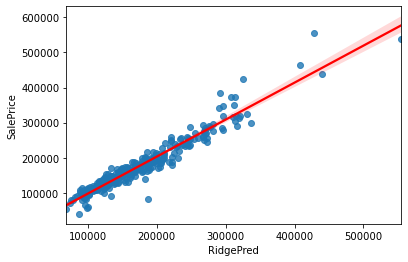

Test score:  0.9082343808642361


C:\Users\smina\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.52819e-22): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


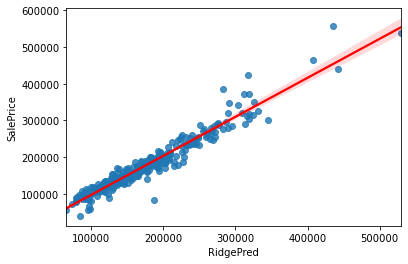

C:\Users\smina\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.47563e-22): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Test score:  0.9107092413279763


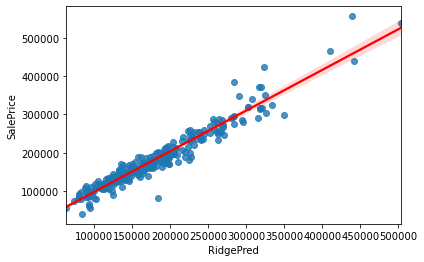

,Num of Features,Alpha,RMSE
0,160.0,13.0,0.123022
1,230.0,18.0,0.120829
2,280.0,20.0,0.119188


In [53]:
df = pd.DataFrame(columns=['Num of Features', 'Alpha', 'RMSE'])

for i in range(len(ridge_alpha_list)):
    model = Ridge(alpha=ridge_alpha_list[i])
    rmse = calc_model_performance(model, features_list[i], ridge_alpha_list[i], 'Ridge')
    df.loc[len(df.index)] = [num_of_features[i], ridge_alpha_list[i], rmse]

df

In [54]:
lasso_alpha_list = [1.55E-04, 3.70E-04, 5.40E-04]

model = Lasso(alpha=lasso_alpha_list[0])

model.fit(X_train[features_list[1]], t_train)

print("Test score: ", model.score(X_test[features_list[1]], t_test))

y_test = model.predict(test_features[features_list[1]]) 

T_test = pd.read_csv('Data/sample_submission.csv')
T_test['SalePrice'] = np.exp(y_test)
#return RMSE, MSE
T_test.to_csv("output.csv", index=False)

Test score:  0.8978398356216875


C:\Users\smina\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.537323328107325, tolerance: 0.018621654879306233
  model = cd_fast.enet_coordinate_descent(


Test score:  0.8959571560317595


C:\Users\smina\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.2044966776455315, tolerance: 0.018621654879306233
  model = cd_fast.enet_coordinate_descent(


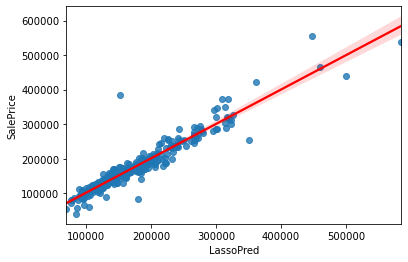

C:\Users\smina\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.940419994812707, tolerance: 0.018621654879306233
  model = cd_fast.enet_coordinate_descent(


Test score:  0.9051414451019337


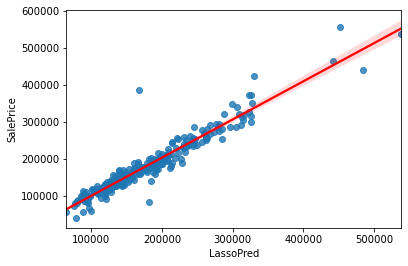

Test score:  0.9092257946602283


C:\Users\smina\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.37690836928472, tolerance: 0.018621654879306233
  model = cd_fast.enet_coordinate_descent(


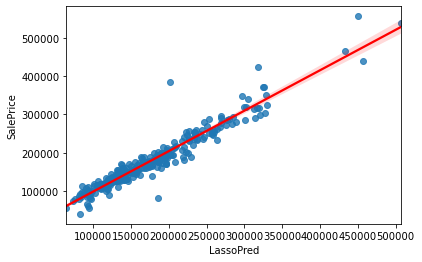

,Num of Features,Alpha,RMSE
0,160.0,0.000155,0.128658
1,230.0,0.000370,0.122848
2,280.0,0.000540,0.120174


In [55]:
df = pd.DataFrame(columns=['Num of Features', 'Alpha', 'RMSE'])

lasso_alpha_list = [1.55E-04, 3.70E-04, 5.40E-04]

for i in range(len(lasso_alpha_list)):
    model = Lasso(alpha=lasso_alpha_list[i])
    rmse = calc_model_performance(model, features_list[i], lasso_alpha_list[i], 'Lasso')
    df.loc[len(df.index)] = [num_of_features[i], lasso_alpha_list[i], rmse]

df

Test score:  0.8918041025965936


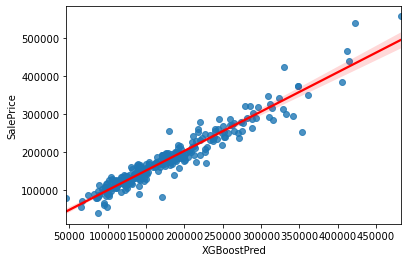

Test score:  0.9003999479340404


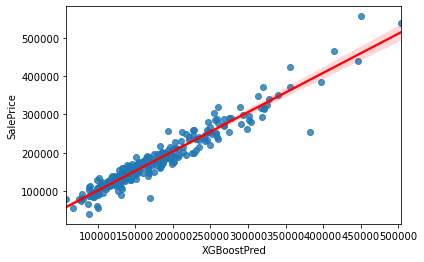

Test score:  0.8943322207507673


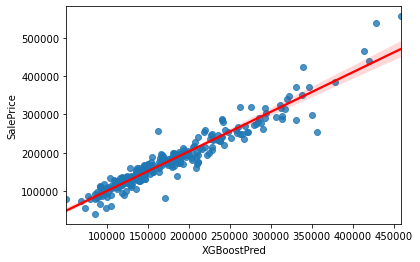

Test score:  0.8982555975478304


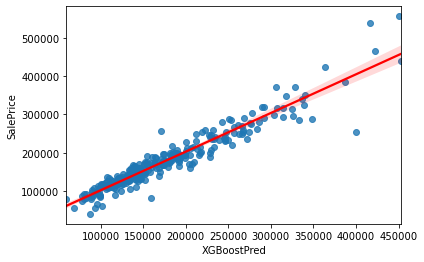

Test score:  0.8901883565360602


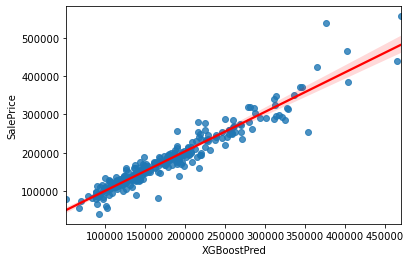

Test score:  0.8979803611409796


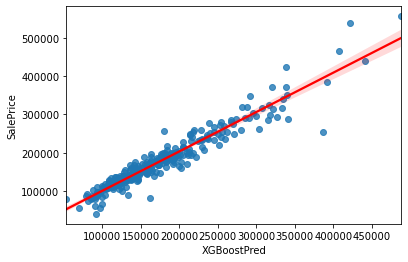

,Num of Features,Subsample,RMSE
0,160.0,0.6,0.131201
1,160.0,0.5,0.125881
2,230.0,0.6,0.129659
3,230.0,0.5,0.127229
4,280.0,0.6,0.132177
5,280.0,0.5,0.127401


In [56]:
df = pd.DataFrame(columns=['Num of Features', 'Subsample', 'RMSE'])

subsamples = [0.6, 0.5]

for i in range(len(features_list)):
    for subsample in subsamples:
        model = XGBRegressor(n_estimators=10000, learning_rate=.1, subsample=subsample)
        rmse = calc_model_performance(model, features_list[i], str(subsample)+"_"+str(i), 'XGBoost')
        df.loc[len(df.index)] = [num_of_features[i], subsample, rmse]

df

In [57]:
def calc_hybrid_perf(model, features, k_test):
    model.fit(X_train[features], t_train)

    print("Test score: ", model.score(X_test[features], t_test))

    y_test = model.predict(X_test[features]) 

    print("RMSE: ",sqrt(mean_squared_error(t_test, y_test)))
    
    y_pred = model.predict(k_test[features])
    
    return y_pred

In [58]:
def combine_pred(y1, y2, filename):
    y_pred = np.append(y1, y2)
    T_test = pd.read_csv('Data/sample_submission.csv')
    T_test['SalePrice'] = np.exp(y_pred)
    T_test.to_csv(filename, index=False)

ridge xgb [0.65, 0.35]


C:\Users\smina\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.52819e-22): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


RMSE:  0.11644499833574391


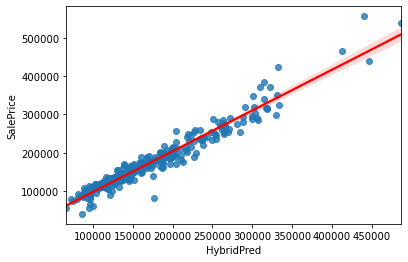

lasso xgb [0.7, 0.3]


C:\Users\smina\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.940419994812707, tolerance: 0.018621654879306233
  model = cd_fast.enet_coordinate_descent(


RMSE:  0.1171490064712204


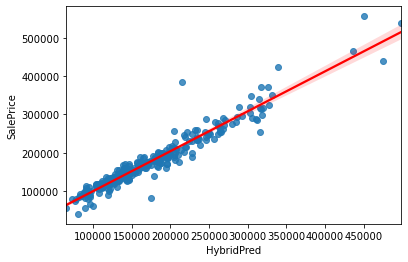

lasso xgb [0.65, 0.35]


C:\Users\smina\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.940419994812707, tolerance: 0.018621654879306233
  model = cd_fast.enet_coordinate_descent(


RMSE:  0.11677882380848983


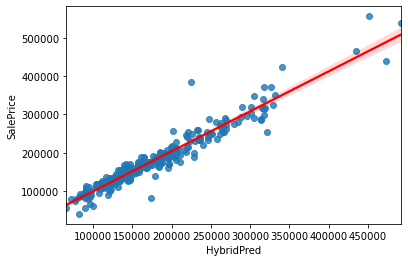

lasso xgb [0.6, 0.4]


C:\Users\smina\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.940419994812707, tolerance: 0.018621654879306233
  model = cd_fast.enet_coordinate_descent(


RMSE:  0.11658082870996683


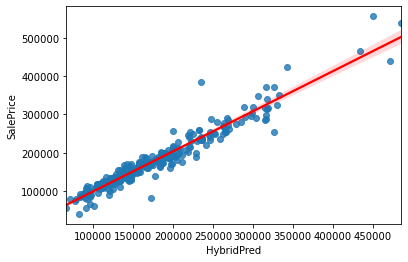

ridge lasso [0.3, 0.35, 0.35]


C:\Users\smina\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.52819e-22): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\smina\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.940419994812707, tolerance: 0.018621654879306233
  model = cd_fast.enet_coordinate_descent(


RMSE:  0.11578727081666061


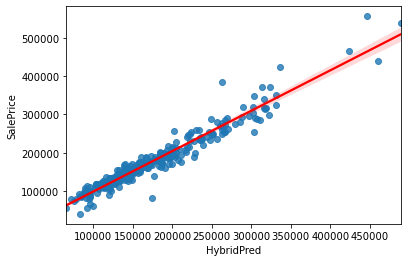

ridge lasso [0.25, 0.4, 0.35]


C:\Users\smina\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.52819e-22): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\smina\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.940419994812707, tolerance: 0.018621654879306233
  model = cd_fast.enet_coordinate_descent(


RMSE:  0.11585314375175293


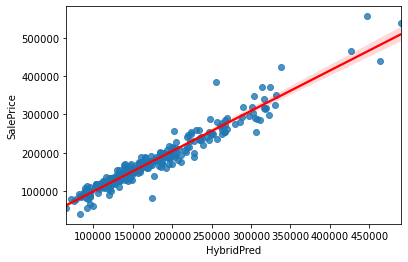

ridge xgb [0.65, 0.35]


C:\Users\smina\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.24833e-22): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


RMSE:  0.11469927537386551


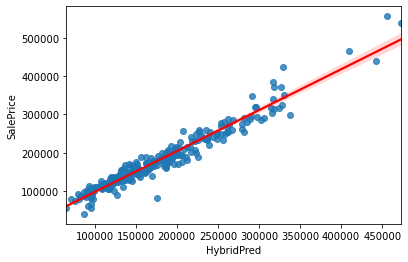

lasso xgb [0.65, 0.35]


C:\Users\smina\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.627523654289444, tolerance: 0.018621654879306233
  model = cd_fast.enet_coordinate_descent(


RMSE:  0.11494210433627737


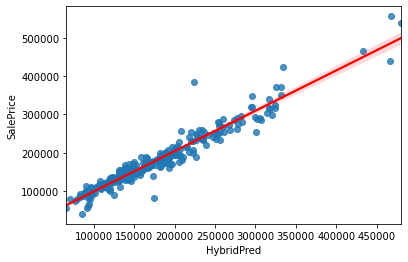

In [60]:
ridge = Ridge(alpha=18)
lasso = Lasso(alpha=3.70E-04)
xgb = XGBRegressor(n_estimators=10000, learning_rate=.1, subsample=0.5)


models = [[('ridge',ridge),('xgb',xgb)], [('lasso',lasso), ('xgb',xgb)], [('lasso',lasso), ('xgb',xgb)],
          [('lasso',lasso), ('xgb',xgb)], [('ridge',ridge),('lasso',lasso), ('xgb',xgb)],
          [('ridge',ridge),('lasso',lasso), ('xgb',xgb)], [('ridge',ridge),('xgb',xgb)], [('lasso',lasso),('xgb',xgb)]]
weights=[[0.65, 0.35], [0.7, 0.3], [0.65, 0.35], [0.60, 0.40], [0.3, 0.35, 0.35],
         [0.25, 0.40, 0.35], [0.65, 0.35], [0.65, 0.35]]
j = 1
for i in range(len(models)):
    print(models[i][0][0], models[i][1][0], weights[i])
    if i > 5:
        j = 2
    ensemble = VotingRegressor(estimators=models[i], weights=weights[i])

    ensemble.fit(X_train[features_list[j]], t_train)

    y_test = ensemble.predict(X_test[features_list[j]])
    # evaluate predictions
    print("RMSE: ",sqrt(mean_squared_error(t_test, y_test)))
    
    regData = pd.DataFrame({'SalePrice':np.exp(t_test), 'HybridPred': np.exp(y_test)})
    
    ax = sns.regplot(x='HybridPred', y="SalePrice", data=regData,
                 line_kws={"color": "red"})

    plt.show()
    
    y_pred = ensemble.predict(test_features[features_list[j]])
    filename = "test_hybrid_"+str(i)+".csv"
    combine_pred(y_pred, [], filename)